In [1]:
import pandas as pd

import torch as t
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary

from model import Net, weight_init

import matplotlib.pyplot as plt

import sys
sys.path.append("..")
from data import Cactus
from train import train

# I. Train

In [2]:
# ResNet model with fully connected layers head
device='cuda' if t.cuda.is_available() else 'cpu'
net=Net().to(device)
net=net.apply(weight_init)

In [3]:
# peek into the strusture of the model
summary(net,(3,32,32))

C:\Users\yc_ya\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1024, 1, 1]          --
|    └─Sequential: 2-1                   [-1, 1024, 1, 1]          --
|    |    └─Conv2d: 3-1                  [-1, 64, 16, 16]          9,408
|    |    └─BatchNorm2d: 3-2             [-1, 64, 16, 16]          128
|    |    └─ReLU: 3-3                    [-1, 64, 16, 16]          --
|    |    └─MaxPool2d: 3-4               [-1, 64, 8, 8]            --
|    |    └─_DenseBlock: 3-5             [-1, 256, 8, 8]           335,040
|    |    └─_Transition: 3-6             [-1, 128, 4, 4]           33,280
|    |    └─_DenseBlock: 3-7             [-1, 512, 4, 4]           919,680
|    |    └─_Transition: 3-8             [-1, 256, 2, 2]           132,096
|    |    └─_DenseBlock: 3-9             [-1, 1024, 2, 2]          2,837,760
|    |    └─_Transition: 3-10            [-1, 512, 1, 1]           526,336
|    |    └─_DenseBlock: 3-11            [-1, 1024

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1024, 1, 1]          --
|    └─Sequential: 2-1                   [-1, 1024, 1, 1]          --
|    |    └─Conv2d: 3-1                  [-1, 64, 16, 16]          9,408
|    |    └─BatchNorm2d: 3-2             [-1, 64, 16, 16]          128
|    |    └─ReLU: 3-3                    [-1, 64, 16, 16]          --
|    |    └─MaxPool2d: 3-4               [-1, 64, 8, 8]            --
|    |    └─_DenseBlock: 3-5             [-1, 256, 8, 8]           335,040
|    |    └─_Transition: 3-6             [-1, 128, 4, 4]           33,280
|    |    └─_DenseBlock: 3-7             [-1, 512, 4, 4]           919,680
|    |    └─_Transition: 3-8             [-1, 256, 2, 2]           132,096
|    |    └─_DenseBlock: 3-9             [-1, 1024, 2, 2]          2,837,760
|    |    └─_Transition: 3-10            [-1, 512, 1, 1]           526,336
|    |    └─_DenseBlock: 3-11            [-1, 1024

In [4]:
# load the data into train and test sets

batchsize=32

train_dataset=Cactus('train')

# Use WeightedRandomSampler to make the training set more balanced
weights=t.FloatTensor(train_dataset.weight_of_labels)
train_sampler=t.utils.data.WeightedRandomSampler(
    weights,len(train_dataset),replacement=True)
trainloader=DataLoader(train_dataset,batch_size=batchsize,
                       sampler=train_sampler,
                       shuffle=False)

val_dataset=Cactus('train')
valloader=DataLoader(val_dataset,batch_size=batchsize,shuffle=True)

test_dataset=Cactus('test')
testloader=DataLoader(test_dataset,batch_size=batchsize,shuffle=False)

In [5]:
# training
net,train_F1_plot, train_loss_plot,val_F1_plot, val_loss_plot=train(
    net, trainloader, valloader, max_epoch=100)

Epoch 1/100
----------
Validation F1 score is  0.9594572766919722
Validation Loss is  0.05944280104597612
Training completed in 0m 55s
Best F1 score: 0.959457

Epoch 2/100
----------
Validation F1 score is  0.9717041800643087
Validation Loss is  0.04784491440653801
Training completed in 1m 3s
Best F1 score: 0.971704

Epoch 3/100
----------
Validation F1 score is  0.9170442662948763
Validation Loss is  0.08663141975719102
Training completed in 0m 60s
Best F1 score: 0.971704

Epoch 4/100
----------
Validation F1 score is  0.9596244131455398
Validation Loss is  0.06718335045357139
Training completed in 1m 3s
Best F1 score: 0.971704

Epoch 5/100
----------
Validation F1 score is  0.9737913071789027
Validation Loss is  0.03862583724941526
Training completed in 1m 2s
Best F1 score: 0.973791

Epoch 6/100
----------
Validation F1 score is  0.9593597991526754
Validation Loss is  0.06582073201277122
Training completed in 1m 0s
Best F1 score: 0.973791

Epoch 7/100
----------
Validation F1 score i

Validation F1 score is  0.9970779220779221
Validation Loss is  0.005718860131366492
Training completed in 0m 45s
Best F1 score: 0.997888

Epoch 53/100
----------
Validation F1 score is  0.9975621647976597
Validation Loss is  0.003560157812438069
Training completed in 0m 44s
Best F1 score: 0.997888

Epoch 54/100
----------
Validation F1 score is  0.9970779220779221
Validation Loss is  0.00494017401237839
Training completed in 0m 44s
Best F1 score: 0.997888

Epoch 55/100
----------
Validation F1 score is  0.9970779220779221
Validation Loss is  0.004714487876079926
Training completed in 0m 45s
Best F1 score: 0.997888

Epoch 56/100
----------
Validation F1 score is  0.9974009096816114
Validation Loss is  0.004947703947936783
Training completed in 0m 44s
Best F1 score: 0.997888

Epoch 57/100
----------
Validation F1 score is  0.9965925685542755
Validation Loss is  0.004907701501827042
Training completed in 0m 44s
Best F1 score: 0.997888

Epoch 58/100
----------
Validation F1 score is  0.997

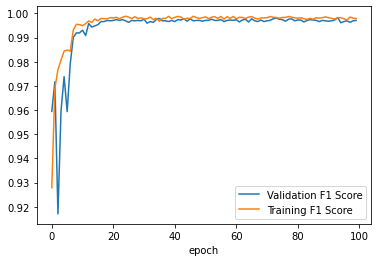

The best validation F1 score is 0.99821


In [6]:
# see how the training and validation F1 scores propogate w epoch
plt.plot(val_F1_plot,label='Validation F1 Score')
plt.plot(train_F1_plot,label='Training F1 Score')
plt.legend()
plt.xlabel('epoch')
plt.show()

print('The best validation F1 score is %1.5f'%max(val_F1_plot))

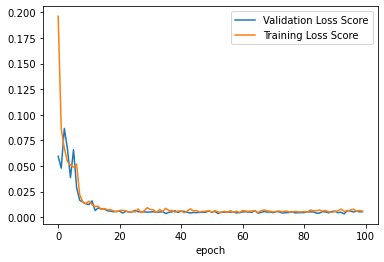

The best validation loss is 0.00316


In [7]:
# see how the training and validation losses propogate w epoch
plt.plot(val_loss_plot,label='Validation Loss Score')
plt.plot(train_loss_plot,label='Training Loss Score')
plt.legend()
plt.xlabel('epoch')
plt.show()

print('The best validation loss is %1.5f'%min(val_loss_plot))

# II. Prediction for Test set

In [5]:
# load the best parameters to the model

net=Net().to(device)
model_date='20210920'
net.load_state_dict(t.load(model_date+'/best_model.pth'))

<All keys matched successfully>

In [6]:
pic_id=[]
results=[]
for ii,(data,path) in enumerate(testloader):
    inputs=t.autograd.Variable(data)
    inputs=inputs.to(device)
    outputs=net(inputs)
    probability=outputs.cpu().detach().numpy()
    
    batch_id=list(path)
    pic_id+=batch_id
    
    batch_results=[1 if prob_i>0.5 else 0 for prob_i in probability]
    results+=batch_results

In [7]:
# save the predicted results to a csv file

submit=pd.DataFrame({"id":pic_id,"has_cactus":results})
submit.to_csv(
    model_date+'/predicted_labels_DenseNet121_FCL.csv',index=False)

Predicted label= 1 :


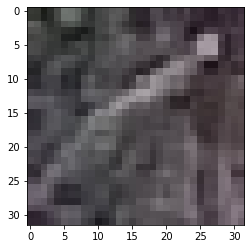

Predicted label= 1 :


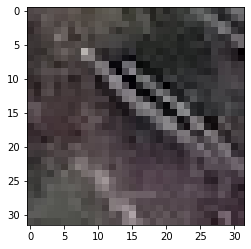

Predicted label= 0 :


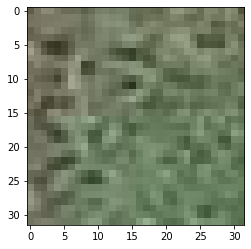

Predicted label= 0 :


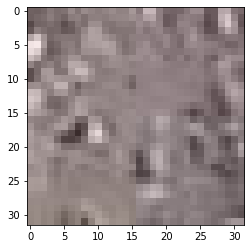

Predicted label= 1 :


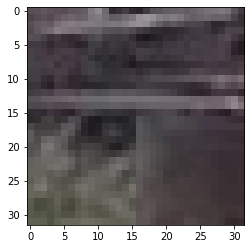

Predicted label= 1 :


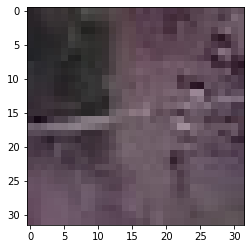

Predicted label= 1 :


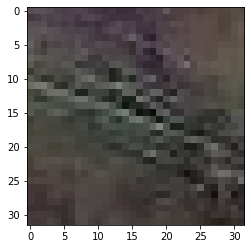

Predicted label= 1 :


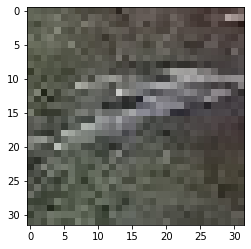

Predicted label= 1 :


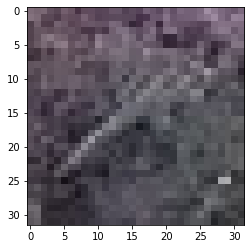

Predicted label= 0 :


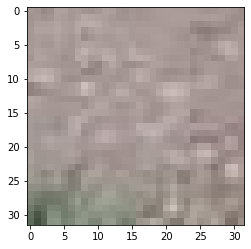

Predicted label= 1 :


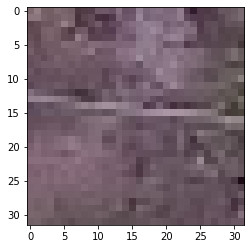

Predicted label= 1 :


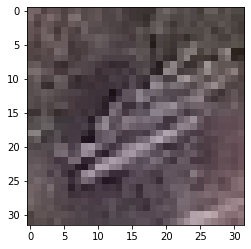

Predicted label= 1 :


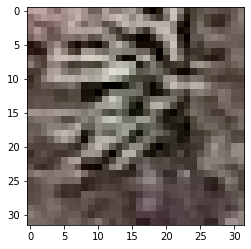

Predicted label= 1 :


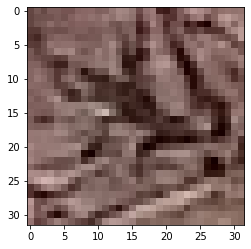

Predicted label= 0 :


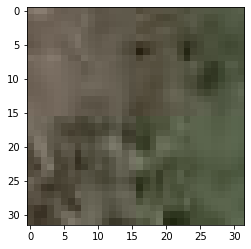

Predicted label= 1 :


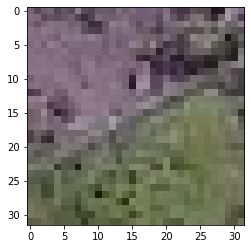

Predicted label= 1 :


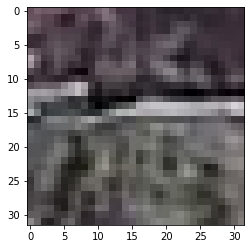

Predicted label= 1 :


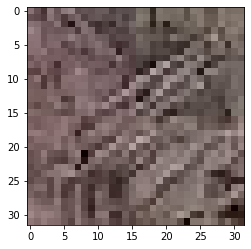

Predicted label= 1 :


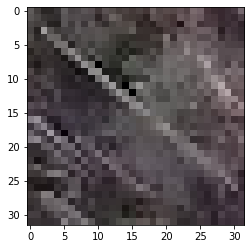

Predicted label= 1 :


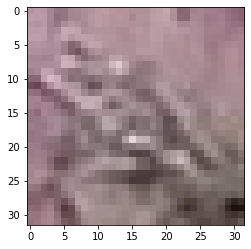

Predicted label= 1 :


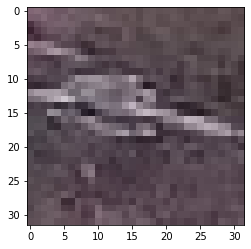

Predicted label= 0 :


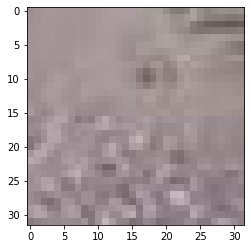

Predicted label= 1 :


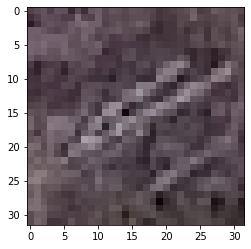

Predicted label= 0 :


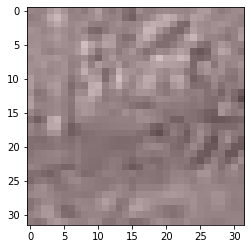

Predicted label= 1 :


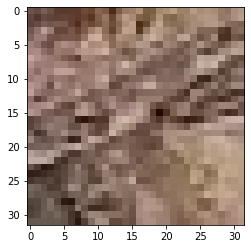

Predicted label= 0 :


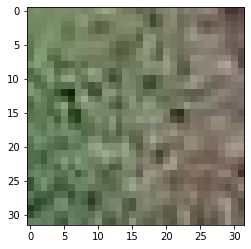

Predicted label= 1 :


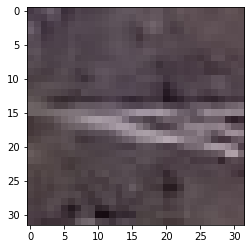

Predicted label= 1 :


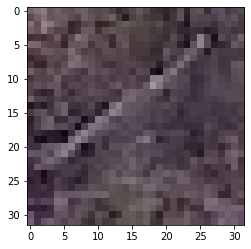

Predicted label= 1 :


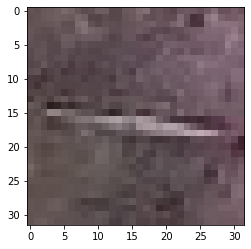

Predicted label= 1 :


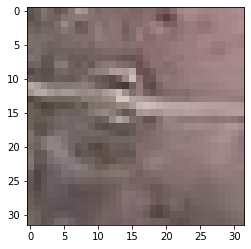

Predicted label= 1 :


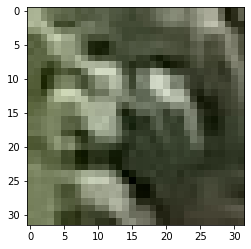

Predicted label= 1 :


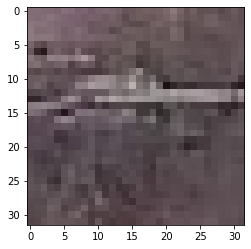

In [8]:
# check some pics using the trained network
dataiter=iter(testloader)

images, path=dataiter.next()

# print the predicted labels using the network
image_labels=[list(
    submit.loc[submit['id']==i,'has_cactus'])[0] for i in path]

for im in range(len(images)):
    
    # print the label
    print('Predicted label=',str(image_labels[im]),':')
    
    plt.figure()
    image=((images[im]+1)/2).permute(1,2,0)
    # the format of (data+1)/2 is just to undo the normalization
    # for showing purpose
    plt.imshow(image)
    plt.show()